In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mksai\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("adult_data_2.csv")

In [4]:
df.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United_States,>50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   education_level  32561 non-null  object
 3   education_num    32561 non-null  int64 
 4   marital_status   32561 non-null  object
 5   occupation       32561 non-null  object
 6   relationship     32561 non-null  object
 7   race             32561 non-null  object
 8   sex              32561 non-null  object
 9   capital_gain     32561 non-null  int64 
 10  capital_loss     32561 non-null  int64 
 11  hours_per_week   32561 non-null  int64 
 12  country          32561 non-null  object
 13  income           32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
df['income'].value_counts()

<=50K    24719
>50K      7842
Name: income, dtype: int64

In [7]:
print(df.shape)

# Dropping the duplicate Rows
df = df.drop_duplicates(keep = 'first')
df.shape

(32561, 14)


(29096, 14)

In [8]:
df['age'].nunique()

73

In [9]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [10]:
df.isnull().sum()

age                0
workclass          0
education_level    0
education_num      0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
country            0
income             0
dtype: int64

In [11]:
# Dropping the rows whose occupation is '?' 
df = df[df.occupation != '?']

df['occupation'].value_counts()

Prof-specialty       3885
Exec-managerial      3719
Adm-clerical         3340
Craft-repair         3298
Sales                3270
Other-service        2996
Machine-op-inspct    1702
Transport-moving     1445
Handlers-cleaners    1179
Farming-fishing       962
Tech-support          874
Protective-serv       631
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
print(df.at[df['age'].idxmin(),'age'])
print(df.at[df['age'].idxmax(),'age'])

17
90


<AxesSubplot:xlabel='age'>

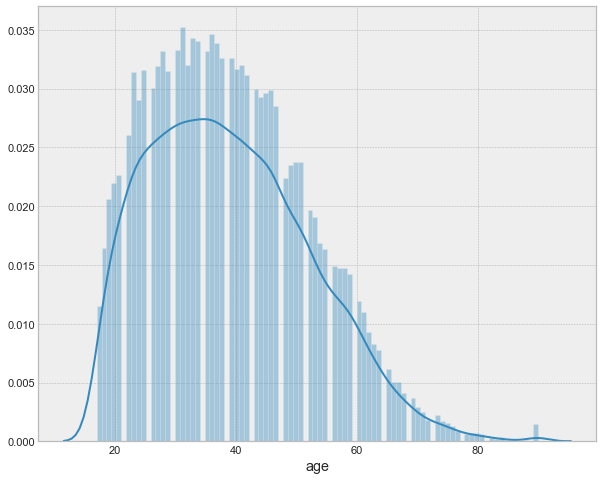

In [53]:
sns.distplot(df['age'], bins = 90)

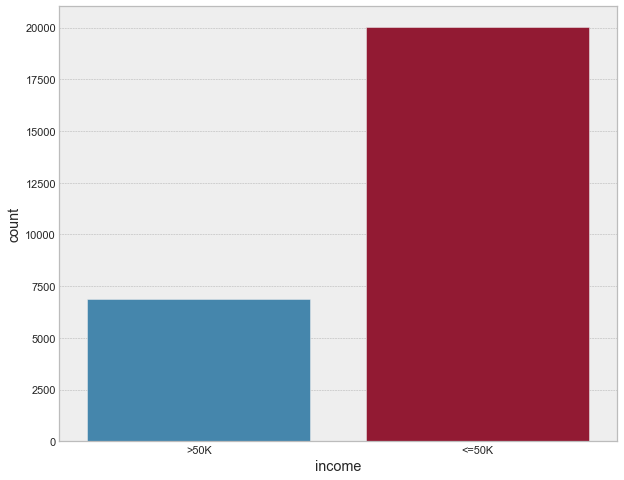

In [55]:
sns.countplot(df['income'],label="Count")
plt.show()

<AxesSubplot:xlabel='income', ylabel='education_num'>

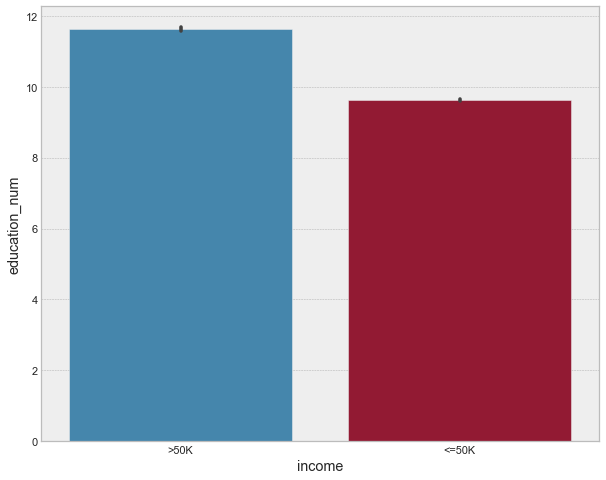

In [61]:
# Explore Education Num vs Income
sns.barplot(y="education_num",x="income",data=df)


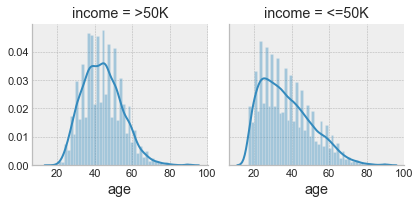

In [63]:
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")
plt.show()

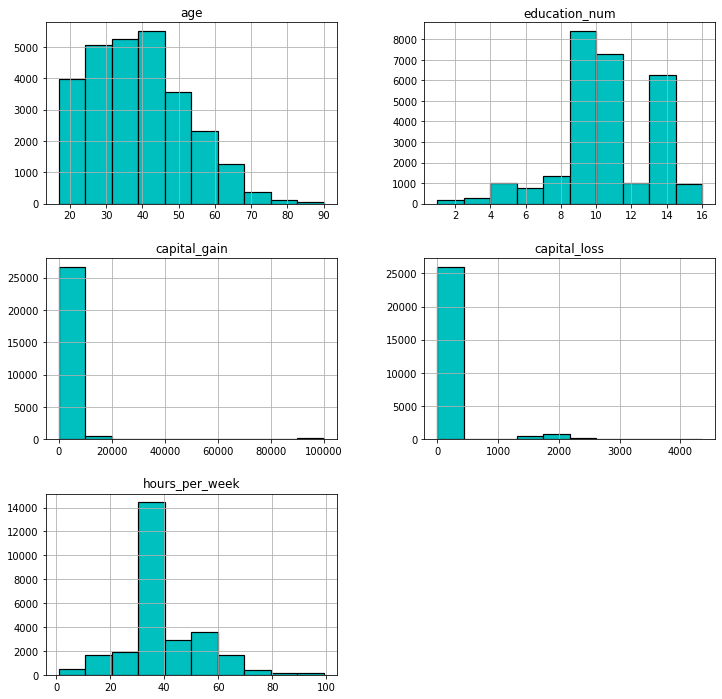

In [14]:
distribution = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [15]:
print (df['hours_per_week'].median())
print (df['hours_per_week'].mean())

40.0
41.18053683942164


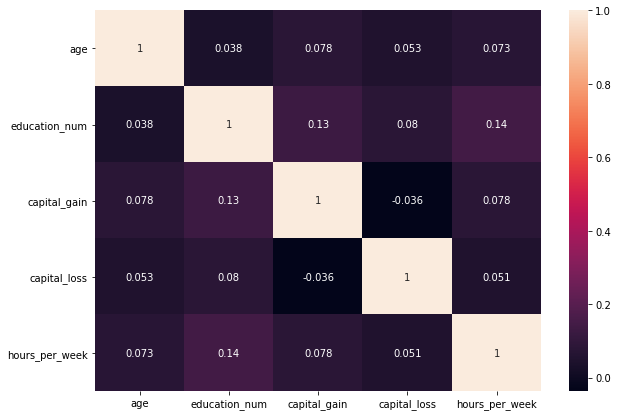

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True);

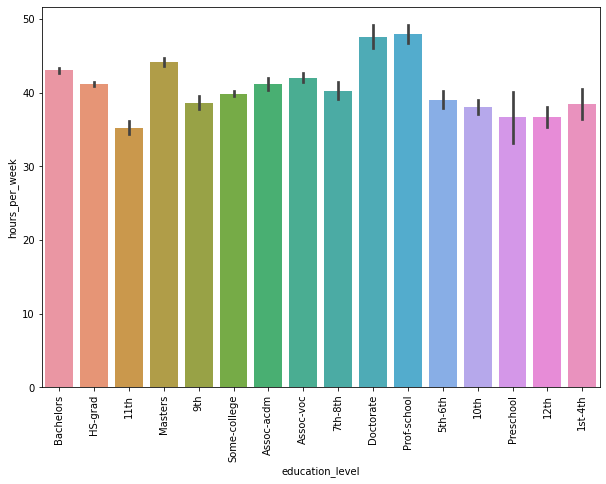

In [17]:
# This shows the hours per week according to the education of the person
plt.figure(figsize=(10,7))
sns_grad = sns.barplot(x = df['education_level'], y = df['hours_per_week'], data = df)
plt.xticks(rotation=90)
plt.show()

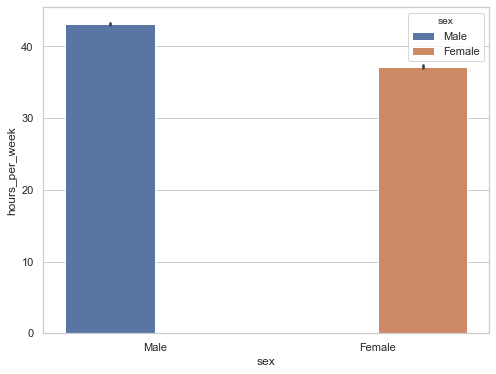

In [18]:
# This bar graph shows the difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df['sex'], y = df['hours_per_week'], data = df,estimator = np.mean, hue = 'sex');

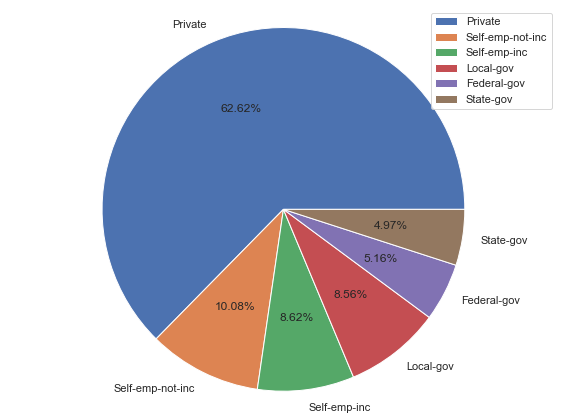

In [19]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%')
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

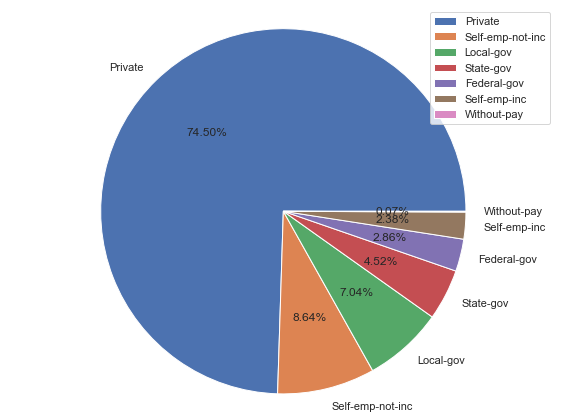

In [20]:
# Creating Pandas Series for the workclasses whose income is less or equal than 50K 
_df_ = df.loc[df['income'] == '<=50K',['workclass']]
workclass_types = _df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns less or equal than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%')
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [22]:
_df_.value_counts()

workclass       
Private             15224
Self-emp-not-inc     1765
Local-gov            1439
State-gov             923
Federal-gov           584
Self-emp-inc          486
Without-pay            14
dtype: int64

In [23]:
# Grouping people according to their country and their income
df = df[df['country'] != '?']
native_more = df.loc[df['income'] == '>50K',['country']].groupby('country').size()
native_less = df.loc[df['income'] == '<=50K',['country']].groupby('country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

In [24]:
print(index_more)
print(index_less)

['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'United_States', 'Vietnam', 'Yugoslavia']
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']


In [25]:
[country for country in index_less if country not in index_more]

['Holand-Netherlands', 'Outlying-US(Guam-USVI-etc)']

In [26]:
# Making DataFrames of the Data
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_more

,Countries,>50K
0,Cambodia,7
1,Canada,36
2,China,20
3,Columbia,2
4,Cuba,25
5,Dominican-Republic,2
6,Ecuador,4
7,El-Salvador,9
8,England,30
9,France,12


In [54]:
# Merging both the Data Frames to be used for plotting
df_fin = pd.merge(df_less, df_more, on = 'Countries')

df_fin

,Countries,<=50K,>50K
0,Cambodia,11,7
1,Canada,71,36
2,China,48,20
3,Columbia,54,2
4,Cuba,67,25
5,Dominican-Republic,65,2
6,Ecuador,23,4
7,El-Salvador,91,9
8,England,56,30
9,France,15,12


<Figure size 1080x576 with 0 Axes>

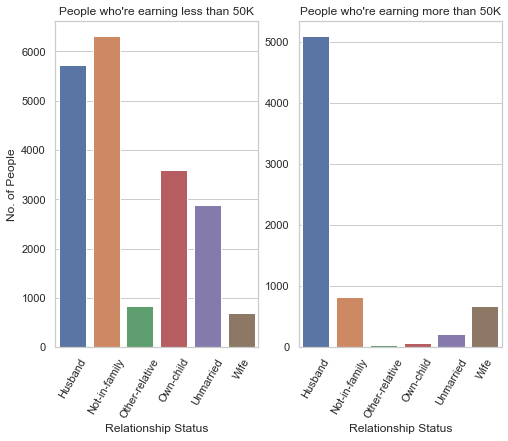

In [27]:
# Setting Parameters
plt.figure(figsize= (15,8))
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("No. of People")
ax[0].set_xlabel("Relationship Status")
ax[1].set_xlabel("Relationship Status")
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

# Grouping people according to their Income and Relationship Status 
rel_less = df.loc[df['income'] == '<=50K',['relationship']].groupby('relationship').size()
rel_more = df.loc[df['income'] == '>50K',['relationship']].groupby('relationship').size()

# This barplot shows the No.of people earning more or less than 50K according to their Relationship Status
sns_rel_1 = sns.barplot(x = list(rel_less.index), y = list(rel_less), ax = ax[0])
sns_rel_2= sns.barplot(x = list(rel_more.index), y = list(rel_more), ax = ax[1])

plt.setp(sns_rel_1.get_xticklabels(), rotation = 60);
plt.setp(sns_rel_2.get_xticklabels(), rotation = 60);


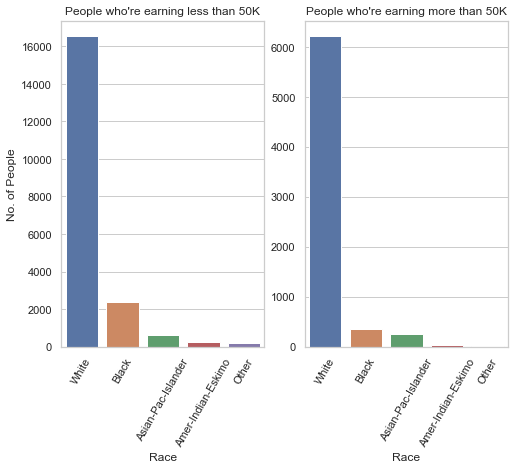

In [28]:
# Setting axes Labels and Titles 
fig, ax = plt.subplots(1,2)
ax[0].set_xlabel('Race')
ax[1].set_xlabel('Race')
ax[0].set_ylabel('No. of People')
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

# Grouping People according to their race and income
race_less = df.loc[df['income'] == '<=50K'].groupby('race').size()
race_more = df.loc[df['income'] == '>50K'].groupby('race').size()

# This barplot shows the no.of people earning more or less than 50K according to their races
sns_race_1 = sns.barplot(x = list(race_less.index), y = list(race_less), ax = ax[0],
                         order = ['White', 'Black','Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])
sns_race_2 = sns.barplot(x = list(race_more.index), y = list(race_more), ax = ax[1],
                        order = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])

plt.setp(sns_race_1.get_xticklabels(), rotation = 60);
plt.setp(sns_race_2.get_xticklabels(), rotation = 60);

In [29]:
# Copying the eda adult dataFrame and reseting the index
df_adult = df.copy()

df_adult = df.reset_index(drop = True)
df_adult.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United_States,>50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
df_adult.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000
mean,39.048877,10.144291,1215.398082,98.505798,41.164548
std,13.188650,2.620106,7805.224835,425.679089,12.346824
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [31]:
# Removing the unkown occupations
df_adult = df_adult[df_adult.occupation != '?']

print (df_adult['occupation'].value_counts())

Prof-specialty       3783
Exec-managerial      3646
Adm-clerical         3291
Craft-repair         3229
Sales                3205
Other-service        2914
Machine-op-inspct    1666
Transport-moving     1420
Handlers-cleaners    1159
Farming-fishing       957
Tech-support          858
Protective-serv       626
Priv-house-serv       141
Armed-Forces            9
Name: occupation, dtype: int64


In [32]:
# Changing the income column into Numerical Value
df_adult['income'] = df_adult['income'].map({'<=50K':0, '>50K':1})

In [35]:
df_adult['income'].value_counts()

0    20023
1     6881
Name: income, dtype: int64

In [36]:
df_adult.dtypes

age                int64
workclass          int32
education_level    int32
education_num      int64
marital_status     int32
occupation         int32
relationship       int32
race               int32
sex                int32
capital_gain       int64
capital_loss       int64
hours_per_week     int64
country            int32
income             int64
dtype: object

In [37]:
# Changing the Categorical Values to Numerical values using the Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df_adult.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df_adult[feature] = label_encoder_feat[feature].fit_transform(df_adult[feature])

df_adult.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,5,9,13,4,0,1,4,1,2174,0,40,39,1
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [38]:
# Shuffling the Data Set
from sklearn.utils import shuffle
df_adult = shuffle(df_adult)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df_adult.drop(columns = ['income', 'education_num'])
target = df_adult['income']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (18832, 12)
Test data set size :  (8072, 12)


<Figure size 864x864 with 0 Axes>

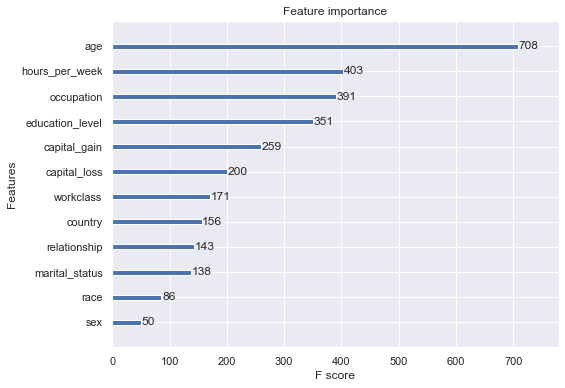

In [39]:
# Plotting the feature importances using the Boosted Gradient Descent
from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.figure(figsize = (12,12))
sns.set(style = 'darkgrid')
plot_importance(model_importance);

In [40]:
# Importing the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [41]:
### Model-1 Logistic Regression

In [42]:
# Training the model_1
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)

print ("The accuracy of model 1 : ",accuracy_score(y_test, pred_1))
print ("The f1 score of model 1 : ", f1_score(y_test, pred_1))

The accuracy of model 1 :  0.7945986124876115
The f1 score of model 1 :  0.44474212993971873


In [43]:
### Model-2 Random Forest Classifier

In [44]:
# Training the model_2
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.8361000991080277
The f1 score of model 2 :  0.6598097197222936


In [45]:
### Model-3 Boosted Gradient Descent

In [46]:
# Training the model 3
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 200)
model_3 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(y_test, pred_3))
print ("The f1 score of model 3 : ", f1_score(y_test, pred_3, average = 'binary'))

[19:45:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The accuracy of model 3 :  0.8642220019821606
The f1 score of model 3 :  0.7186858316221767


In [47]:
### Model-4 SVM

In [48]:
# Training the model 4
svc = SVC(kernel = 'rbf', max_iter = 1000, probability = True)
model_4 = svc.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_test)

print ("The accuracy of model 4 : ",accuracy_score(y_test, pred_4))
print ("The f1 score of model 4 : ", f1_score(y_test, pred_4, average = 'binary'))

The accuracy of model 4 :  0.7301783944499505
The f1 score of model 4 :  0.21823402727925337


In [49]:
### Analysis of the model performances

### Classification Reports

In [50]:
list_pred = [pred_1, pred_2, pred_3, pred_4]
model_names = ["Logistic Regression", "Random Forest Classifier", "Boosted Gradient Descent", "SVC"]

for i, predictions in enumerate(list_pred) :
    print ("Classification Report of ", model_names[i])
    print ()
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

Classification Report of  Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87      6003
        >50K       0.72      0.32      0.44      2069

    accuracy                           0.79      8072
   macro avg       0.76      0.64      0.66      8072
weighted avg       0.78      0.79      0.76      8072

Classification Report of  Random Forest Classifier

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6003
        >50K       0.70      0.62      0.66      2069

    accuracy                           0.84      8072
   macro avg       0.79      0.77      0.78      8072
weighted avg       0.83      0.84      0.83      8072

Classification Report of  Boosted Gradient Descent

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      6003
        >50K       0.77      0.68      0.72      2069

    accuracy                   

In [51]:
for i, pred in enumerate(list_pred) :
    print ("The Confusion Matrix of : ", model_names[i])
    print (pd.DataFrame(confusion_matrix(y_test, pred)))
    print ()

The Confusion Matrix of :  Logistic Regression
      0    1
0  5750  253
1  1405  664

The Confusion Matrix of :  Random Forest Classifier
      0     1
0  5466   537
1   786  1283

The Confusion Matrix of :  Boosted Gradient Descent
      0     1
0  5576   427
1   669  1400

The Confusion Matrix of :  SVC
      0    1
0  5590  413
1  1765  304



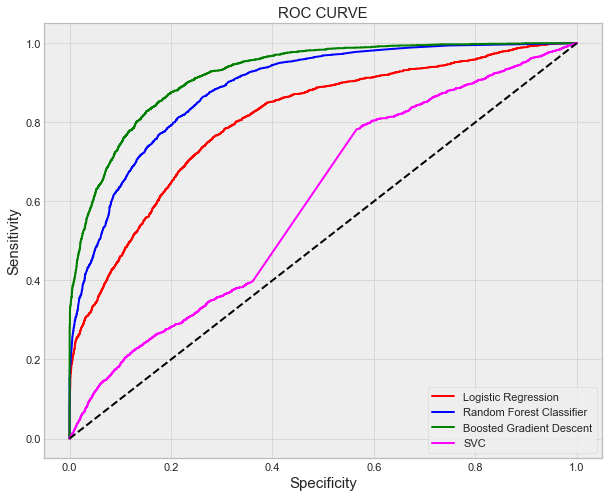

In [52]:
# ROC Curve for the classification models

from sklearn.metrics import roc_auc_score, roc_curve
models = [model_1, model_2, model_3, model_4]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()